# Explore data
Get descriptive stats and visuals for the 6 groups with current datasets

In [1]:
import pandas as pd
import glob

In [2]:
files = glob.glob("twitter_output/Group*.csv")

In [3]:
def ori_df_to_visual_df(filename, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    
    print(groupname)
    print("Length of data        ", len(df))
    print("Unique users          ", len(set(df.screen_names)))
    print("Retweets              ", len(df[df["retweets"] == True]))
    print("Retweets from tweets  ", len(df[df["retweets"] == True])/len(df))
    print("Screen_names          ", df.screen_names.unique())
    print("-----------------------------------")
    
    df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
    df['just_date'] = df['created_at'].dt.date
    #df_date = df[["just_date", "id_str"]]
    
    df0 = df.groupby('just_date')['id_str'].count()
    df_date = df0.to_frame().reset_index().rename(columns={"id_str": "count"})
    
    return df_date

In [4]:
df0 = ori_df_to_visual_df(files[0], "Group1")
df1 = ori_df_to_visual_df(files[1], "Group2")
df2 = ori_df_to_visual_df(files[2], "Group3")
df3 = ori_df_to_visual_df(files[3], "Group4")
df4 = ori_df_to_visual_df(files[4], "Group5")
df5 = ori_df_to_visual_df(files[5], "Group6")

IndexError: list index out of range

## Visualize over time

In [5]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

In [6]:
files

[]

NameError: name 'df0' is not defined

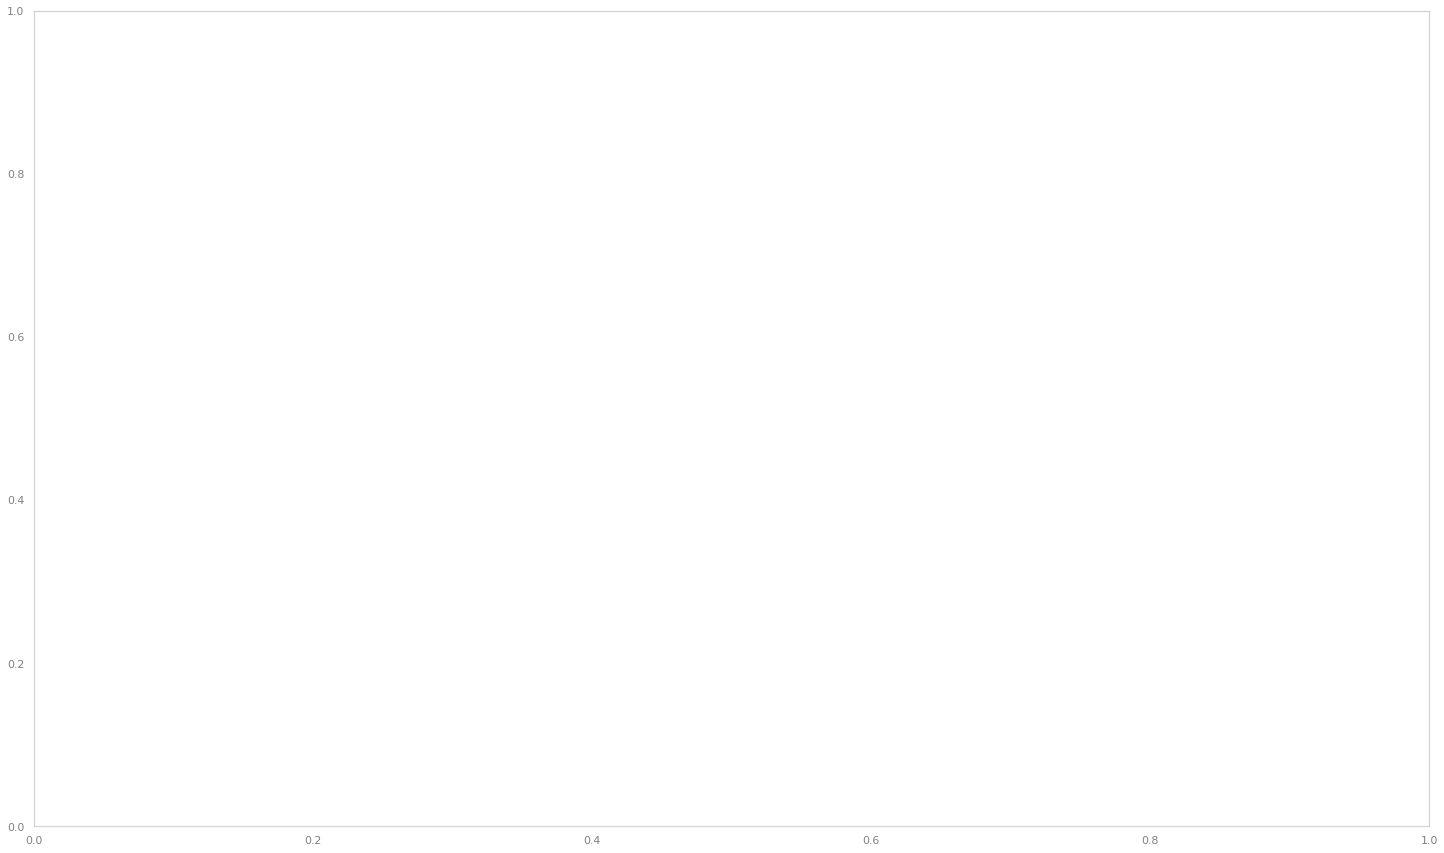

In [7]:
#df = df.loc[df['Hashtag'].isin(['#china', "#opinion"])]
#nr_hash = len(df["Hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group1: Non Feminist",
                  color = "red",
                  linewidth = 2.5, data = df0)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group2: Anti Feminist",
                  linewidth = 2.5, data = df1)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group3: Pro Dad",
                  linewidth = 2.5, data = df2)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group4: Right Wing",
                  linewidth = 2.5, data = df3)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group5: Pseudo Nazi",
                  linewidth = 2.5, data = df4)
ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group6: Ethno Nationalistic",
                  linewidth = 2.5, data = df5)

ax.set(xlabel="Time", ylabel = "Count of tweets")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
fig.suptitle('Tweeting frequency', fontsize=40)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

#plt.ylim(0, 80)

## Check what a retweet timeline could look like

In [8]:
df = pd.read_csv(files[2]).drop_duplicates().reset_index(drop = True)

df["date"] = pd.to_datetime(df["created_at"], utc = True).dt.strftime('%Y-%m-%d')
df[df["retweets"] == True]

IndexError: list index out of range

In [9]:
df[df["date"] == "2020-04-23"]

NameError: name 'df' is not defined

NameError: name 'df2' is not defined

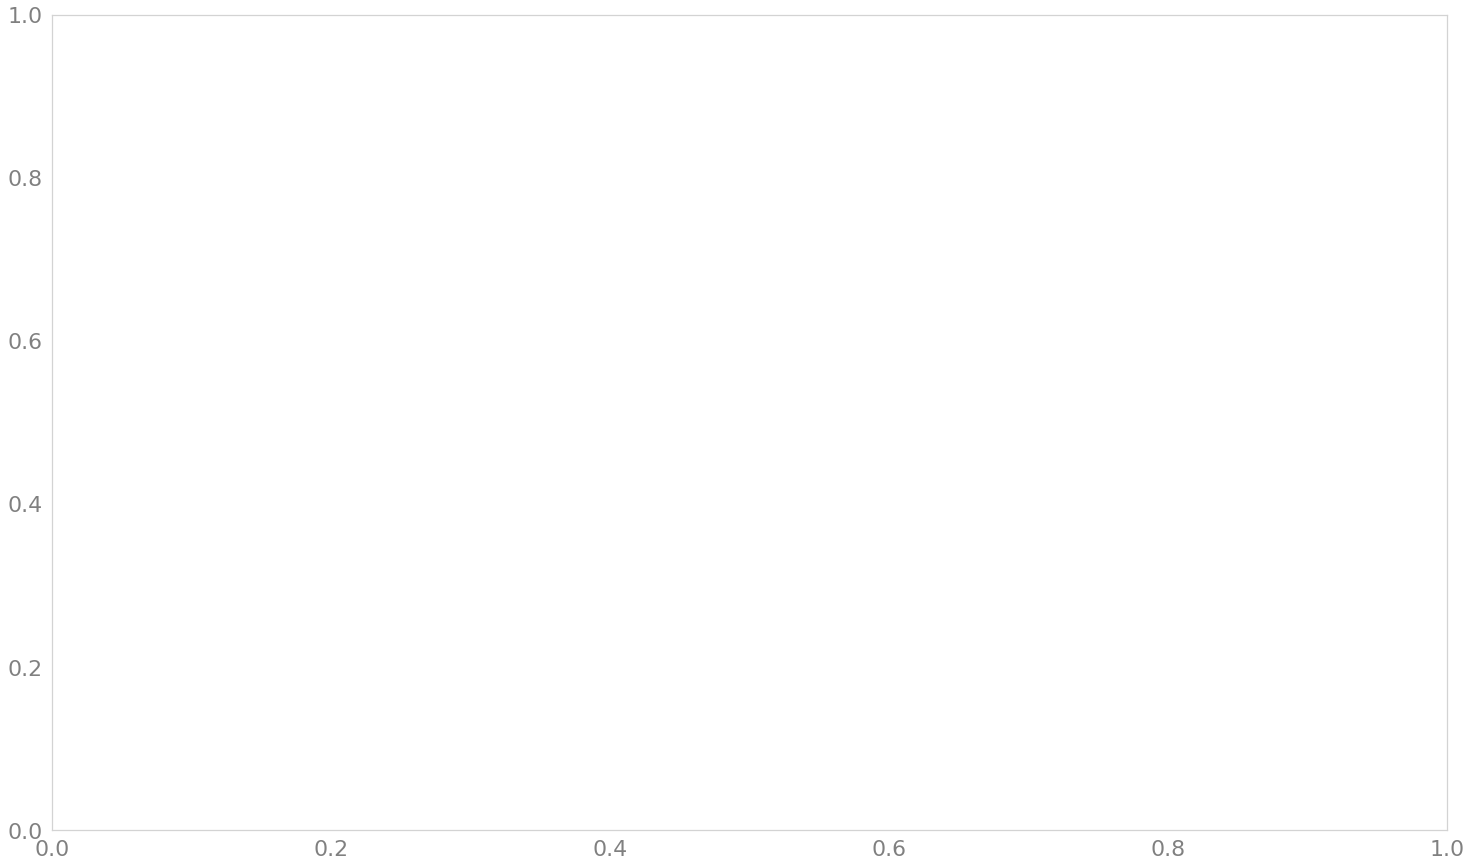

In [10]:
themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)


fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="just_date", y="count", 
                  label = "Group1: Non Feminist",
                  color = "red",
                  linewidth = 2.5, data = df2)

In [11]:
for i in df["text"]:
    print(i)
    print("\n")

NameError: name 'df' is not defined

## Check within groups per users

In [12]:
def RT_to_namescount_df(filename, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    
    df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
    df['just_date'] = df['created_at'].dt.date
    
    whole = df.groupby('screen_names')['id_str'].count()
    whole = whole.to_frame().reset_index().rename(columns={"id_str": "Total"})
    
    retweets = df[df["retweets"] == True].reset_index(drop=True).groupby('screen_names')['id_str'].count()
    retweets = retweets.to_frame().reset_index().rename(columns={"id_str": "Retweets"})
    
    df = pd.merge(whole, retweets)
    df["Group"] = groupname
    
    return df

In [13]:
df0 = RT_to_namescount_df(files[0], "Group1")
df1 = RT_to_namescount_df(files[1], "Group2")
df2 = RT_to_namescount_df(files[2], "Group3")
df3 = RT_to_namescount_df(files[3], "Group4")
df4 = RT_to_namescount_df(files[4], "Group5")
df5 = RT_to_namescount_df(files[5], "Group6")

IndexError: list index out of range

In [14]:
data = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index(drop = True)
data

NameError: name 'df0' is not defined

NameError: name 'data' is not defined

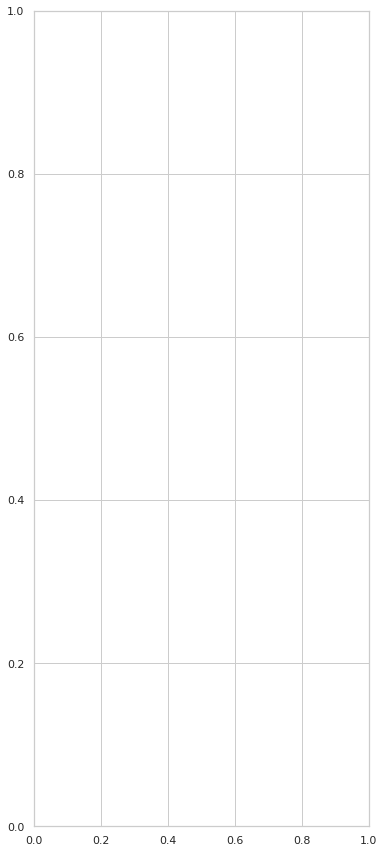

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total tweet counts
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="screen_names", 
            data=data, hue="Group",
            #label="Total", 
            #color="b"
           )

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Retweets", y="screen_names", hue="Group", data=data,
            #label="Retweets", 
            color="b",
            alpha=0.1
           )

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(ylabel="",
#       xlabel="Users tweets vs  RT's")

#sns.despine(left=True, bottom=True)

# Check hashtags

In [16]:
df = pd.read_csv(files[2]).drop_duplicates().reset_index(drop = True)

IndexError: list index out of range

In [17]:
df["text"][6]

NameError: name 'df' is not defined

In [18]:
import re
def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)
    
    data["created_at"] = pd.to_datetime(data["created_at"], utc=True)
    data['just_date'] = data['created_at'].dt.date

    # Let's take a subset of necessary columns, add id
    df = data[["just_date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['just_date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")
    
    df = df.reset_index()

    return df

def hashtags_visual(filename, count_nr, groupname):
    df = pd.read_csv(filename).drop_duplicates().reset_index(drop = True)
    hashtags = hashtag_per_row(df)
    
    f = hashtags.groupby('hashtag')['index'].count()
    f = f.to_frame().reset_index().rename(columns={"index": "count"})

    freq_data = f.sort_values(by=['count'], ascending=False).reset_index(drop=False)[0:count_nr]

    fig, ax = plt.subplots(figsize=(25,15))

    themes.theme_minimal(grid=False, ticks=False, fontsize=18)
    #palette = sns.color_palette("inferno", nr_hash)

    ax = sns.barplot(y="hashtag", x="count", 
                     #palette = palette, 
                     data = freq_data)

    ax.set(xlabel="Count", ylabel = "Hashtag")
    ax.xaxis.get_label().set_fontsize(25)
    ax.yaxis.get_label().set_fontsize(25)
    ax.axes.set_title(groupname,fontsize=30)

    plt.xticks(fontsize=30)
    plt.yticks(fontsize=40)
    sns.set(font_scale = 4)

In [19]:
hashtags_visual(files[0], 10, "Group1")

IndexError: list index out of range

In [20]:
hashtags_visual(files[1], 10, "Group2")

IndexError: list index out of range

In [21]:
hashtags_visual(files[2], 10, "Group3")

IndexError: list index out of range

In [22]:
hashtags_visual(files[3], 10, "Group4")

IndexError: list index out of range

In [23]:
hashtags_visual(files[4], 10, "Group5")

IndexError: list index out of range